In [1]:
from sklearn.datasets import fetch_openml

In [18]:
mnist = fetch_openml('mnist_784', as_frame=False) # open mnist dataset as numpy array

In [19]:
x, y = mnist['data'], mnist['target'] # x is the data, y is the label

In [20]:
x.shape

(70000, 784)

In [21]:
y.shape

(70000,)

In [22]:
%matplotlib inline

In [23]:
import matplotlib 
import matplotlib.pyplot as plt

In [26]:
some_digit = x[36001] # get a digit from the dataset
some_digit_image = some_digit.reshape(28, 28) # reshape to 28x28 from 784 1D matrix

(-0.5, 27.5, 27.5, -0.5)

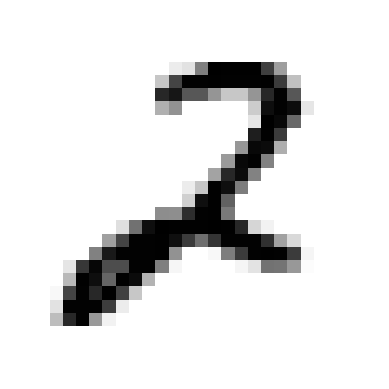

In [28]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off') # remove axis

In [29]:
y[36001]

'2'

In [31]:
x_train, x_test = x[:60000], x[60000:] # get 0 to 59999 for training and 60000 to end for testing
y_train, y_test = y[:60000], y[60000:]

In [33]:
import numpy as np
shuffle_index = np.random.permutation(60000) # shuffle the training data, so different digits are in different arrays
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

Creating 2 detector

In [48]:
y_train = y_train.astype(np.int8) # convert y_train to int8
y_test = y_test.astype(np.int8) # convert y_test to int8
y_train_2 = (y_train == 2) # True for all 2s, False for all other digits
y_test_2 = (y_test == 2)

In [49]:
y_train_2

array([False, False,  True, ..., False, False, False])

In [40]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [41]:
from sklearn.linear_model import LogisticRegression 

In [55]:
clf = LogisticRegression(tol=0.1) 

In [56]:
clf.fit(x_train, y_train_2)

w:\rupes\Utilities\Python 3.9.6\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [57]:
clf.predict([some_digit])

array([ True])